##Práctico 2: Selección de Variables

El análisis de componentes principales (PCA) puede ser de utilidad para la tarea de selección de variables, aunque se considera más un técnica de *extracción de características*. Sin embargo, no quisimos perder la oportunidad de explorar más cosas de esta técnica dado su simpleza.

In [ ]:
#instalar librerías
!pip install scanpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.2/119.2 kB 15.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 10.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=19b9c7c1c493a67f18c71440fc098b62ce803bec750316025495a73673ae3322
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8027 sha256=7b403becc6352f37d22f0ca92c8ace6550c69b789ffc3a5d2f1b930bbd7f8657
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9

In [ ]:
#Importar librerias necesarios
from google.colab import drive #importar desde drive a colab
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

ruta = '/content/drive/MyDrive/Curso/Practico 1|2/Datos/'


In [ ]:
drive.mount('/content/drive') #acceden a sus documentos de drive

Mounted at /content/drive


In [ ]:
#Primera actividad: cargar los datos de https://flycellatlas.org/

haltere_r =  ruta + 'haltere.h5ad'
haltere_ds = sc.read_h5ad(haltere_r)
haltere_df = haltere_ds.to_df()

In [ ]:
# Pasamos de DataFrame a Numpy Array
X = haltere_df.to_numpy()

In [ ]:
#Vamor a calcular primero los componentes pricipales de forma manual

# Centramos los datos
media = np.mean(X, axis=0)
X_n = X - media

# Calcula la matriz de covarianza respecto a las columnas
cov_matrix = np.cov(X_n, rowvar=False)

# Vectores y valores propios
val_propios, vec_propios = np.linalg.eig(cov_matrix)

# Ordena los vectores y valores propios
indices_ordenados = np.argsort(val_propios)[::-1]
val_propios = val_propios[indices_ordenados]
vec_propios = vec_propios[:, indices_ordenados]

# Obtenemos los componentes principales
nPCA = 2
componentes_principales = vec_propios[:, :nPCA]

# Proyecta los datos sobre las nuevas dimensiones obtenidas
X_pca_m = np.dot(X, componentes_principales)


In [ ]:
varianza_total = np.sum(val_propios)
varianza_explicada = [round(val / varianza_total, 8) for val in val_propios]

print((varianza_explicada))

[0.04695519, 0.02201294, 0.01730216, 0.01310052, 0.01273549, 0.01135717, 0.00879517, 0.00614499, 0.00518015, 0.00507124, 0.00490567, 0.00452452, 0.00355761, 0.00345317, 0.00335455, 0.00331721, 0.00320929, 0.00287395, 0.00269853, 0.00246051, 0.00233088, 0.00221212, 0.00215164, 0.00204594, 0.00193565, 0.00189373, 0.00185579, 0.00179407, 0.00177454, 0.00173942, 0.00171176, 0.00169197, 0.00167419, 0.00166602, 0.00164163, 0.00162968, 0.00160973, 0.00158014, 0.00157149, 0.00156393, 0.00154778, 0.00153151, 0.0015053, 0.00149172, 0.0014864, 0.00147155, 0.00146098, 0.00145359, 0.00144292, 0.00143552, 0.00142821, 0.00142195, 0.00140406, 0.0013901, 0.00138431, 0.00137681, 0.00136843, 0.00135838, 0.00135092, 0.00134312, 0.0013373, 0.00132177, 0.0013107, 0.00130173, 0.00129503, 0.00128994, 0.00128502, 0.00128262, 0.00127341, 0.00127217, 0.00126035, 0.0012525, 0.00124601, 0.00124024, 0.00123711, 0.00123165, 0.00122909, 0.00122176, 0.00121258, 0.00120744, 0.00120233, 0.00119694, 0.00119521, 0.0011901

In [ ]:
#PCA con scanpy

#creamos un nuevo archivo anndata
adata = sc.AnnData(X=haltere_df.to_numpy())
adata.var_names = haltere_df.columns  # Lista de nombres de genes
adata.obs_names = haltere_df.index  # Lista de nombres de celdas

#calculamos PCA
sc.tl.pca(adata)
varianza_scanpy = adata.uns['pca']['variance_ratio']

In [ ]:
pca = PCA()
X_pca_sklearn = pca.fit_transform(X)
varianza_sklearn = pca.explained_variance_ratio_

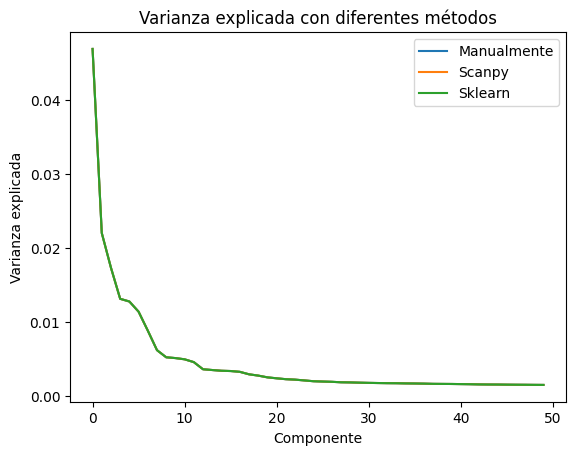

In [ ]:
plt.plot(varianza_explicada[:50] , label='Manualmente')
plt.plot(varianza_scanpy, label='Scanpy')
plt.plot(varianza_sklearn[:50], label='Sklearn')

plt.xlabel('Componente')
plt.ylabel('Varianza explicada')
plt.title('Varianza explicada con diferentes métodos')
plt.legend()

plt.show()

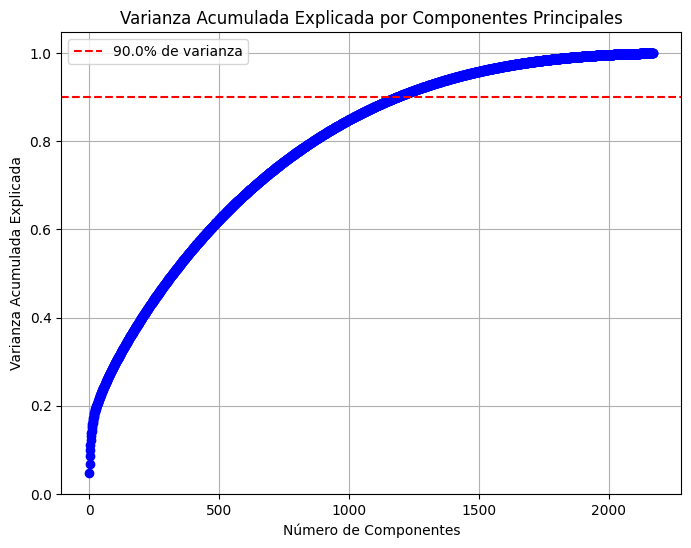

In [ ]:
# Dado que demostramos que con los tres métodos obtenemos resultados iguales
# vamos a trabajar con los datos obtenidos por sklearn por comodidad

# Vamos a guardar el valor de cada gen en cada uno de los componentes
# pero antes, queremos saber cuántos componentes principales explican un porcentaje deseado de la varianza en nuestros datos originales
# es decir, la dispersión de los datos respecto a la media

porcentaje_deseado = 0.90
varianza_acumulada = np.array(varianza_sklearn).cumsum()  # cumsum() es un método de numpy que calcula la suma acumulativa en un vector

# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(varianza_acumulada) + 1), varianza_acumulada, marker='o', linestyle='-', color='b')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Acumulada Explicada')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.grid(True)

# Línea de corte respecto al porcentaje deseado
plt.axhline(y=porcentaje_deseado, color='r', linestyle='--', label=f'{porcentaje_deseado*100}% de varianza')

plt.legend()
plt.show()


In [ ]:
#Vamos a obtener el valores de los genes en cada componente
#Esa forma podemos apreciar a que gen le está dando mayor o menor importancia

In [ ]:
pca.components_.shape #cada componente principal es

(2171, 2171)

In [ ]:
valores_componentes = pca.components_  # directamente obtenidos con sklearn
df_valores_componentes = pd.DataFrame(valores_componentes, columns=haltere_df.columns)

# Aclarar que el vector propio no se forma a partir del valor del gen en las células.
# Sino de la cov. del gen con el resto de los genes
df_valores_componentes = df_valores_componentes.iloc[:1111, :]

# Imprimir el DataFrame
print(df_valores_componentes)

index    5-HT1A    5-HT2A    5-HT2B     5-HT7    AANAT1      APC4  ATPsynCF6L  \
0      0.013566 -0.006750  0.012967  0.007883 -0.003795 -0.001704    0.000416   
1      0.002532 -0.006572  0.001643  0.002929  0.000426  0.001235    0.015294   
2     -0.000866 -0.009294 -0.000919  0.000282  0.009624 -0.000232   -0.004507   
3     -0.008128  0.002473 -0.002969 -0.005784  0.034910 -0.000839    0.000586   
4      0.003366  0.007736  0.003524  0.000333 -0.019714 -0.003521    0.003597   
...         ...       ...       ...       ...       ...       ...         ...   
1106   0.034885 -0.005621 -0.027469  0.006459  0.020879 -0.038289   -0.005905   
1107  -0.027791  0.012524  0.026466  0.004140  0.001131 -0.018260    0.000349   
1108   0.034420 -0.001134 -0.012564 -0.032072 -0.010937  0.036345    0.006261   
1109   0.020792 -0.035933  0.054385  0.010992 -0.018510 -0.017999   -0.003691   
1110  -0.041291 -0.024340 -0.011352 -0.017360  0.036423  0.011752   -0.030001   

index  ATPsynGL      ATbp  

In [ ]:
def ordena_df(df, n_top=100):
    # Aplicar la función a cada fila del DataFrame
    def columnas_importantes(fila):
        columnas_ordenadas = sorted(fila.items(), key=lambda x: abs(x[1]), reverse=True)
        nombres_columnas = [nombre for nombre, _ in columnas_ordenadas[:n_top]]
        return nombres_columnas

    # Crear un nuevo DataFrame con las columnas ordenadas por valor absoluto
    df_ordenado = df.apply(columnas_importantes, axis=1)

    return df_ordenado

In [ ]:
df_pca_ordenado = ordena_df(df_valores_componentes, 100)
df_pca_ordenado.to_excel(ruta + 'pca_haltere.xlsm')
print(df_pca_ordenado)

0       [Rdl, Sh, cac, Syt1, slo, tutl, SK, pHCl-1, sh...
1       [Acp95EF, Acp98AB, Mst57Da, CG3124, Mst57Db, B...
2       [Ppn, Col4a1, Hml, zfh1, pnr, srp, Pxn, LpR2, ...
3       [CG4928, Octbeta2R, sv, Ndae1, Gbs-70E, CG1735...
4       [CG1213, CG4716, sv, CG6067, Lst, l(2)41Ab, Rb...
                              ...                        
1106    [CG30046, trol, CG34330, Cralbp, CG10175, ver,...
1107    [Sr-CI, Obp83cd, CG13315, CG42342, pdm2, CG155...
1108    [Gbs-70E, hay, Sema2a, exp, bb8, CG42382, CG81...
1109    [Vajk2, CG40006, Cralbp, CG32683, lncRNA:CR321...
1110    [CG42382, CG18281, fz3, Def, CG4928, obst-A, C...
Length: 1111, dtype: object
